In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Explore The Data

In [507]:
path = os.getcwd()
train = pd.read_csv(path+'/data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [508]:
train.isnull().sum() # check for missing data,  we miss some info in 'Age', 'Embarked' and a lot more in the 'Cabin' column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [509]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [510]:
# seperate data into numerical and categorical

df_num= train[['Age','SibSp','Parch','Fare']]
df_str = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

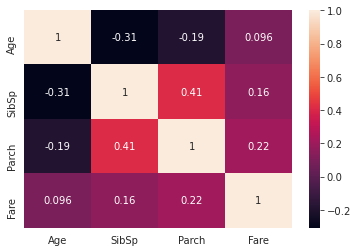

In [511]:
# look for correlations in the numerical data 

print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)

In [512]:
# compare survival rate across Age, SibSp, Parch, and Fare 

pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


          Ticket
Survived        
0            549
1            342


<AxesSubplot:xlabel='Survived', ylabel='count'>

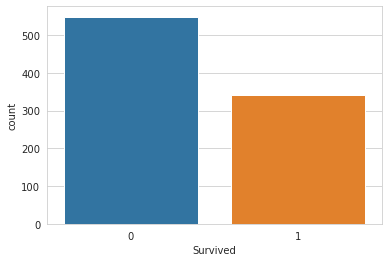

In [513]:
# lets check the number of survivors and non survivors
sns.set_style('whitegrid')
print(pd.pivot_table(train, index = 'Survived', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived') 

# Feature engineering

### Sex

Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Survived', ylabel='count'>

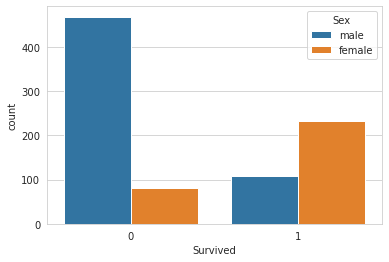

In [514]:
# lets check the number of male and female survivors and non survivors respectively 
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Sex')

### Pclass

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


<AxesSubplot:xlabel='Survived', ylabel='count'>

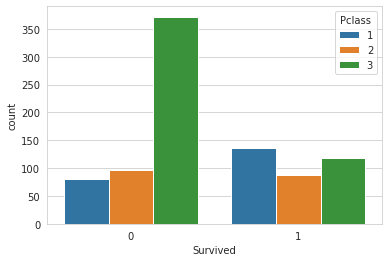

In [515]:
# lets check the number of survivors and non survivors based on their  Ticket Class 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Pclass') 

In [516]:
def Pclass_cat(n_cla):
    '''
    Transform 'Pclass' column to string type
    '''
    if n_cla == 1:
        return '1st'
    elif n_cla == 2:
        return '2nd'
    else:
        return '3rd'

In [517]:
train["Pclass"] = train["Pclass"].apply(Pclass_cat)

### Embarked

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


<AxesSubplot:xlabel='Survived', ylabel='count'>

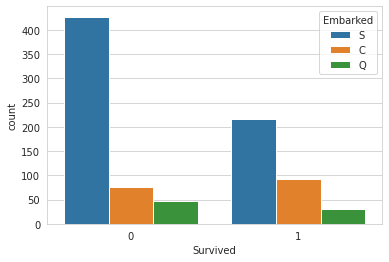

In [518]:
# lets check the number of survivors and non survivors based on their  Embarked place
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Embarked') 

In [519]:
# We miss some data associated with the Embarked place of some passengers, we will try to impute that missing data based on a reasonable guess 
train[train['Embarked'].isnull()]  # both of them were in the 1st class and their Fare prices were both 80

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1st,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1st,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [520]:
#Then, show the table of median Fare values sliced by Pclass and Embarked again:
train.groupby([train['Pclass'],train['Embarked']]).median()

PassengerId  Survived   Age  SibSp  Parch     Fare
Pclass Embarked                                                    
1st    C               453.0       1.0  36.5    0.0    0.0  78.2667
       Q               329.5       0.5  38.5    1.5    0.0  90.0000
       S               493.0       1.0  37.0    0.0    0.0  52.0000
2nd    C               390.0       1.0  25.0    1.0    0.0  24.0000
       Q               323.0       1.0  43.5    0.0    0.0  12.3500
       S               439.0       0.0  30.0    0.0    0.0  13.5000
3rd    C               483.0       0.0  20.0    0.0    0.0   7.8958
       Q               400.5       0.0  21.5    0.0    0.0   7.7500
       S               432.0       0.0  25.0    0.0    0.0   8.0500

In [521]:
# Based on the Pclass and the Sex we impute 'Embarked' with reasonable guesses
train.loc[61, 'Embarked'] = 'C'
train.loc[829, 'Embarked'] = 'C'

**Based on the result, the median Fare price of passengers Embarked on C and were in the 1st class is 76.7, which is quite similar to 80. Therefore, it’s safe to fill in the missing value of Embarked information as “C”**

### Age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

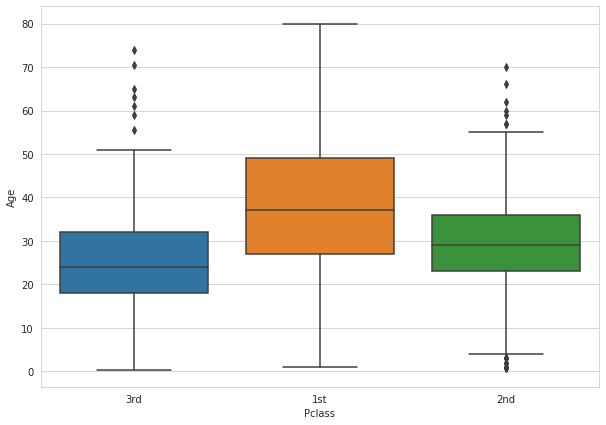

In [522]:
# We miss some data associated with the Age of some passengers, we will try to impute that missing data based on a reasonable guess

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

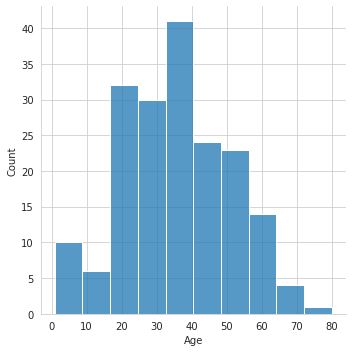

In [523]:
# lets check the Age of the passengers for whom we have info
sns.displot(data=train.dropna(), x='Age')

In [524]:
def impute_age(cols):
    '''
    It seems like a good approach to impute the Age based on the passenger class. For example older people may had more time to accumulate wealth and 
    be in the first class etc.
    '''
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

def AgeGroup(age):
    '''
    We decide to seperate the passengers into 4 Age Groups
    '''
    if age <= 10:
        return 'Kid'
    elif age <= 20:
        return 'Adolescent'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Old'

In [525]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1) # filled 'Age' column with reasonable guesses 
train.isnull().sum() # filled 'Age' column with reasonable guesses


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

AgeGroup  Adolescent  Adult  Kid  Old
Survived                             
0                 71    410   26   42
1                 44    238   38   22


<AxesSubplot:xlabel='Survived', ylabel='count'>

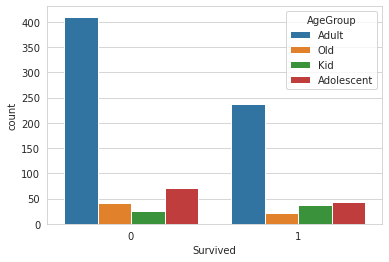

In [526]:
train['AgeGroup'] = train['Age'].apply(AgeGroup)

# lets check the number of survivors and non survivors based on their  AgeGroup 
print(pd.pivot_table(train, index = 'Survived', columns = 'AgeGroup', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'AgeGroup') 

In [527]:
# We now drop the columns that we used 
train.drop('Age', axis= 1, inplace=True)

### SibSp and Parch

In [528]:
def FamilySize(cols):
    '''
    We decide to count the number of family members and categorize the family size in three categories
    '''
    size = cols[0]+cols[1]
    if size < 1:
        return 'Alone'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'

FamilySize  Alone  Large  Medium
Survived                        
0             374     40     135
1             163      7     172


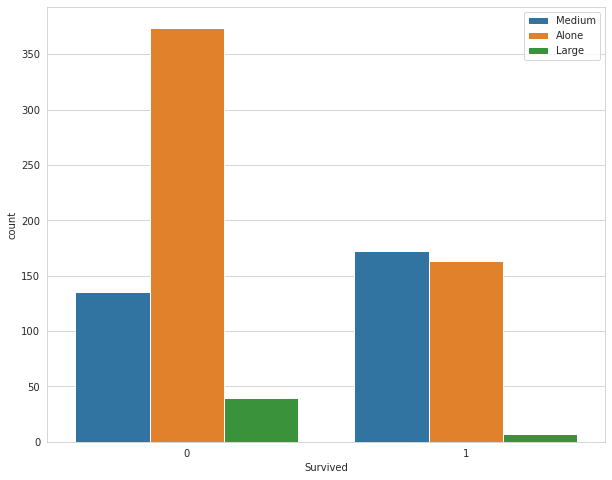

In [529]:
# Family members
train['FamilySize'] = train[['SibSp','Parch']].apply(FamilySize, axis=1)

# lets check the number of survivors and non survivors
plt.figure(figsize=(10,8))
print(pd.pivot_table(train, index = 'Survived', columns = 'FamilySize', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'FamilySize') 
plt.legend(loc='upper right')

In [530]:
# We now drop the columns that we used 
train.drop(['SibSp','Parch'], axis=1, inplace=True)

### Ticket

In [531]:
train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
236852      1
17463       1
2626        1
350034      1
349209      1
Name: Ticket, Length: 681, dtype: int64

Numeric_Tickets  False  True 
Survived                     
0                  142    407
1                   88    254


<AxesSubplot:xlabel='Survived', ylabel='count'>

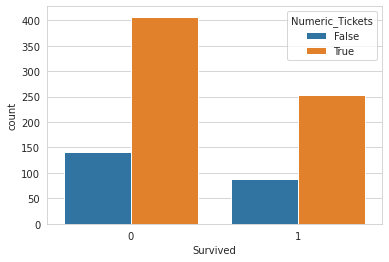

In [532]:
# Some tickets have only numbers, while other tickets contain also letters. Lets try to find motifs based on theat difference
train['Numeric_Tickets'] = train['Ticket'].apply(lambda x: True if x[0].isnumeric()==True else False)

# lets check the number of survivors and non survivors
print(pd.pivot_table(train, index = 'Survived', columns = 'Numeric_Tickets', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Numeric_Tickets') 

**It does not seem to be any difference between tickets where the first character is a number or not, but we can can explore if there is 
something interesting depending on the specific number or the specific letter**

In [533]:
# Maybe the first letter/number of the Ticket can give us some info

first_num = []
first_letter = []
first_num_2 = []
for i in train['Ticket'].values:
    if i[0].isnumeric(): 
        first_num.append(i[0])
    else: 
        first_letter.append(i[0])
        first_num_2.append(i.split()[-1][0])

In [534]:
print(np.unique(first_num,return_counts=True))
print(np.unique(first_letter,return_counts=True))

train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0])

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1'), array([146, 183, 301,  10,   3,   6,   9,   2,   1]))
(array(['A', 'C', 'F', 'L', 'P', 'S', 'W'], dtype='<U1'), array([29, 47,  7,  4, 65, 65, 13]))


Ticket_first_char     1     2      3    4    5    6    7    8    9
Survived                                                          
0                  54.0  98.0  229.0  8.0  3.0  5.0  8.0  2.0  NaN
1                  92.0  85.0   72.0  2.0  NaN  1.0  1.0  NaN  1.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

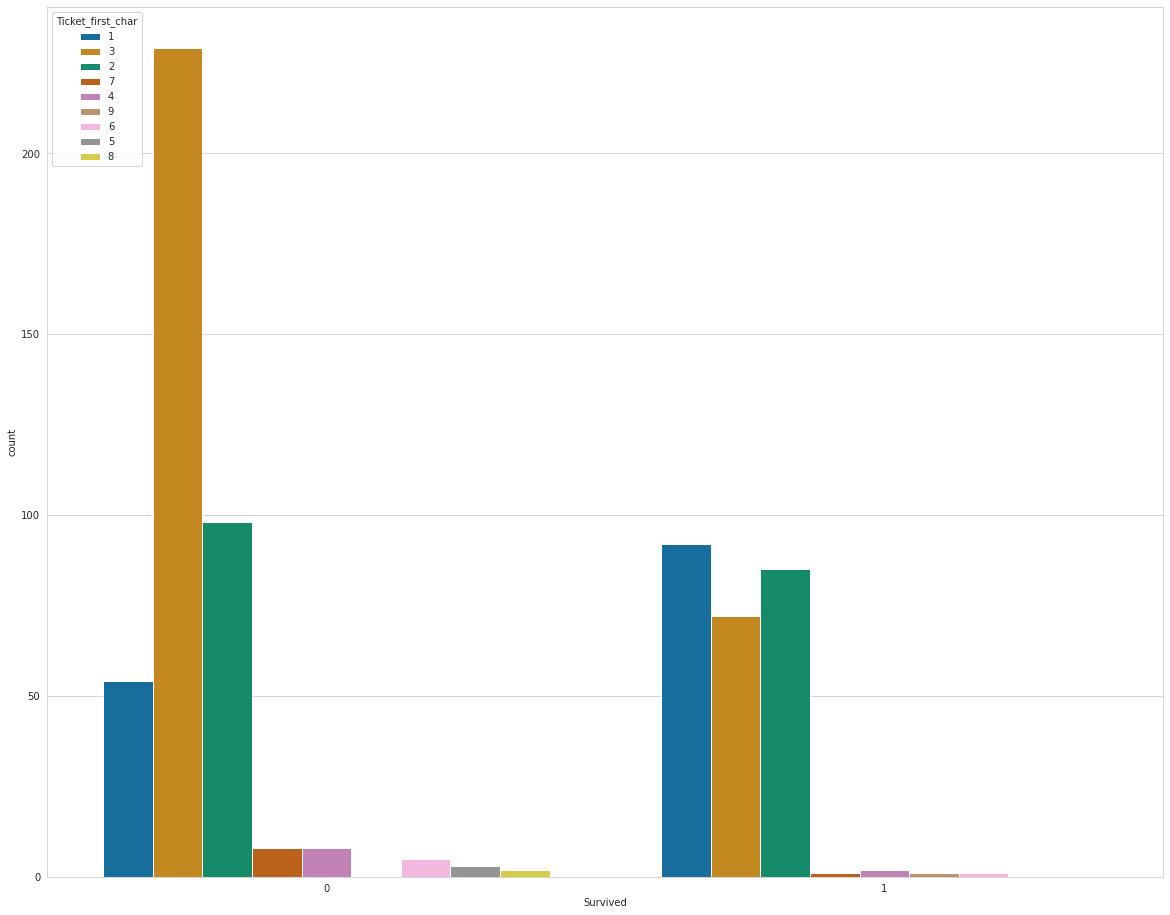

In [535]:
numeric = train[train['Ticket'].apply(lambda x: x[0].isnumeric())]
print(pd.pivot_table(numeric, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(20,16))
sns.countplot(data=numeric, x='Survived',hue = 'Ticket_first_char',palette='colorblind') 

**We can clearly see some patterns here eg people where the first number on their ticket was 1 where more likely to survive
than people where the first number on their ticket was 3. Maybe the first number indicates the position of the passenger on the ship etc.**

Ticket_first_char   A   C  F  L   P   S   W
Survived                                   
0                  27  31  3  3  23  44  11
1                   2  16  4  1  42  21   2


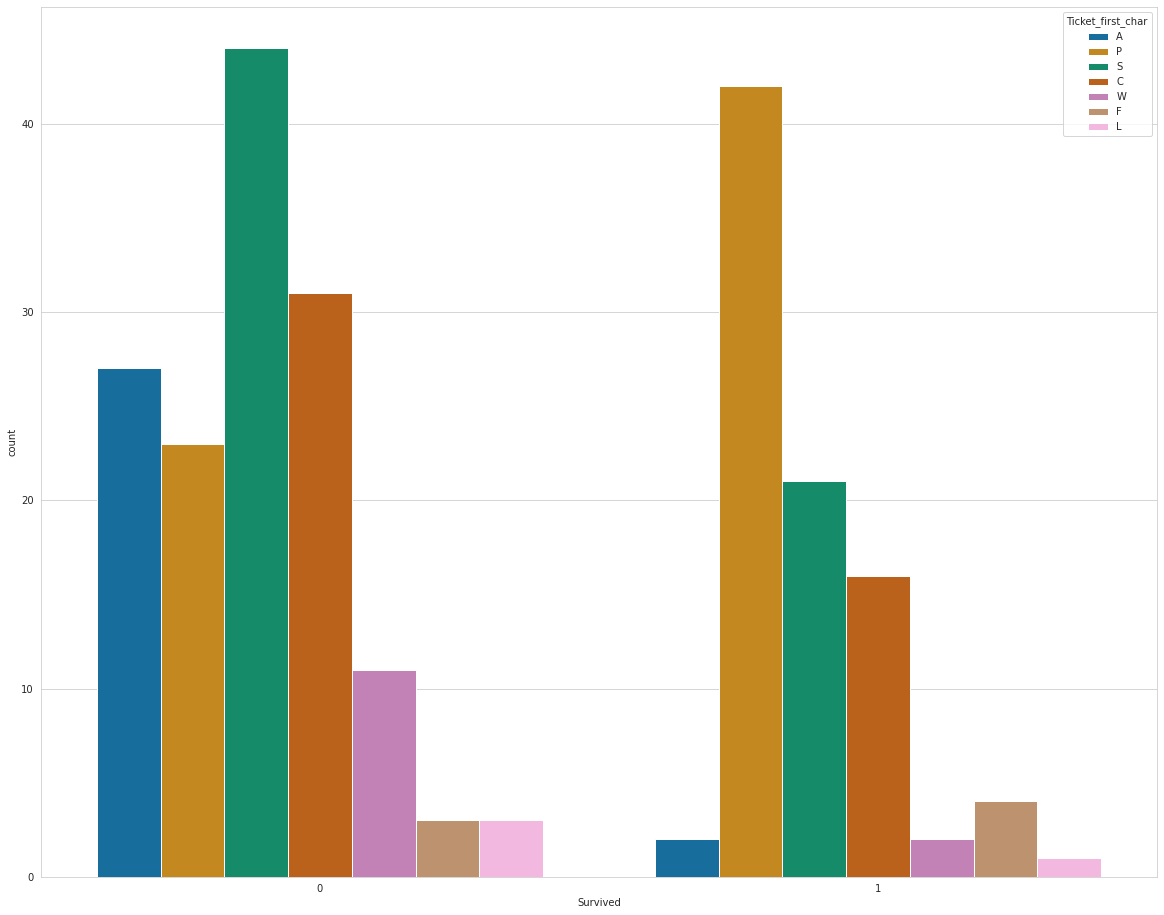

In [536]:
letter = train[train['Ticket'].apply(lambda x: x[0].isnumeric())== False]
print(pd.pivot_table(letter, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(20,16))
sns.countplot(data=letter, x='Survived',hue = 'Ticket_first_char',palette='colorblind') 
plt.show()

**We can clearly see some patterns here eg people where the first letter on their ticket was P where more likely to survive
than people where the first letter on their ticket was A. It is also interesting to notice that most people where the first 
letter on their ticket was P had also number 1 as the first number on the numerical part of the ticket name. On the other hand
most people where the first letter on their ticket was A had not  number 1 as the first number on the numerical part of the ticket name.
Maybe the letter is associated just with a cabin, while the first number still indicates the position of the passenger on the ship, thus we gonna
use this numbers to our model.**

In [537]:
train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0] if x[0].isnumeric() else x.split()[-1][0])

# four passengers did not paid a fare and their ticket says 'LINE', we decide to give them 0
train['Ticket_first_char'] = train['Ticket_first_char'].apply(lambda x: '0' if x=='L' else x) 

# We now drop the columns that we used 
train.drop(['Ticket','Numeric_Tickets'], axis=1, inplace=True)

### Name

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Mme               1
the Countess      1
Jonkheer          1
Ms                1
Capt              1
Sir               1
Don               1
Name: Salutation, dtype: int64


<AxesSubplot:>

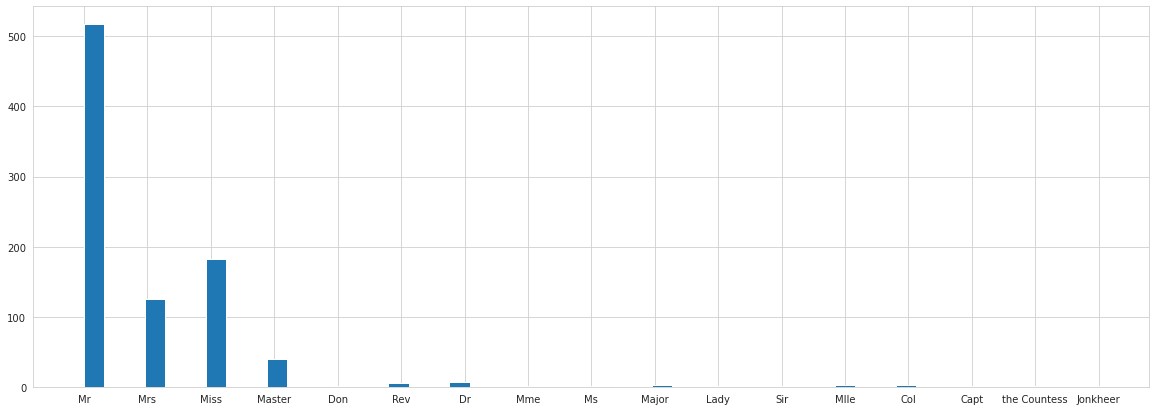

In [538]:
# It is interesting to to use the Name column and try to find some info eg based on the titles prefixing a person's name

train["Salutation"] = train['Name'].apply(lambda x: x.strip().split('.'))
train["Salutation"] = train["Salutation"].apply(lambda x: x[0].split(','))
train["Salutation"] = train["Salutation"].apply(lambda x: x[1])
train["Salutation"] = train["Salutation"].apply(lambda x: x.strip())
print(train["Salutation"].value_counts())
train["Salutation"].hist(figsize=(20,7),bins=50)

In [539]:
# We decided to replace the prefix of some passengers and keep only the 4 most common 

import_people = train[train["Salutation"].apply(lambda prefix: prefix not in ['Mr', 'Mrs', 'Miss', 'Master'])]
print(pd.pivot_table(import_people, index = 'Survived', columns = 'Salutation', values = 'Sex' ,aggfunc ='count'))

Salutation  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Mlle  Mme   Ms  Rev  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0   NaN  NaN  NaN  6.0   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0   2.0  1.0  1.0  NaN   

Salutation  Sir  the Countess  
Survived                       
0           NaN           NaN  
1           1.0           1.0  


In [540]:
# We to be carefull because some prefixes may correspond to a male or a female eg on Dr is female

import_people.groupby(['Salutation','Sex']).count()

PassengerId  Survived  Pclass  Name  Fare  Cabin  \
Salutation   Sex                                                        
Capt         male              1         1       1     1     1      1   
Col          male              2         2       2     2     2      1   
Don          male              1         1       1     1     1      0   
Dr           female            1         1       1     1     1      1   
             male              6         6       6     6     6      2   
Jonkheer     male              1         1       1     1     1      0   
Lady         female            1         1       1     1     1      1   
Major        male              2         2       2     2     2      2   
Mlle         female            2         2       2     2     2      2   
Mme          female            1         1       1     1     1      1   
Ms           female            1         1       1     1     1      0   
Rev          male              6         6       6     6     6      0   
Sir          male              1         1       1     1     1      1   
the Countess female            1         1       1     1     1      1   

                     Embarked  AgeGroup  FamilySize  Ticket_first_char  
Salutation   Sex                                                        
Capt         male           1         1           1                  1  
Col          male           2         2           2                  2  
Don          male           1         1           1                  1  
Dr           female         1         1           1                  1  
             male           6         6           6                  6  
Jonkheer     male           1         1           1                  1  
Lady         female         1         1           1                  1  
Major        male           2         2           2                  2  
Mlle         female         2         2           2                  2  
Mme          female         1         1           1                  1  
Ms           female         1         1           1                  1  
Rev          male           6         6           6                  6  
Sir          male           1         1           1                  1  
the Countess female         1         1           1                  1

In [541]:
# We replace the prefixes with reasonable guesses eg Ms to Miss while Col to Mr

train["Salutation"] = train["Salutation"].apply(lambda x: 'Miss' if x in ['Ms', 'Lady', 'Mlle', 'Mme'] else x)
train["Salutation"] = train["Salutation"].apply(lambda x: 'Master' if x in ['Major','Don', 'Sir'] else x)
train["Salutation"] = train["Salutation"].apply(lambda x: 'Mr' if x in ['Col', 'Capt', 'Jonkheer', 'Rev'] else x)
train["Salutation"] = train["Salutation"].apply(lambda x: 'Mrs' if x == 'the Countess' else x)

male_Drs = train.loc[(train['Salutation'] == 'Dr') & (train['Sex'] == 'male')].index
female_Drs = train.loc[(train['Salutation'] == 'Dr') & (train['Sex'] == 'female')].index
train.loc[male_Drs,'Salutation'] = 'Mr'
train.loc[female_Drs,'Salutation'] = 'Mrs'

Salutation  Master  Miss   Mr  Mrs
Survived                          
0               19    55  449   26
1               25   132   84  101


<AxesSubplot:xlabel='Survived', ylabel='count'>

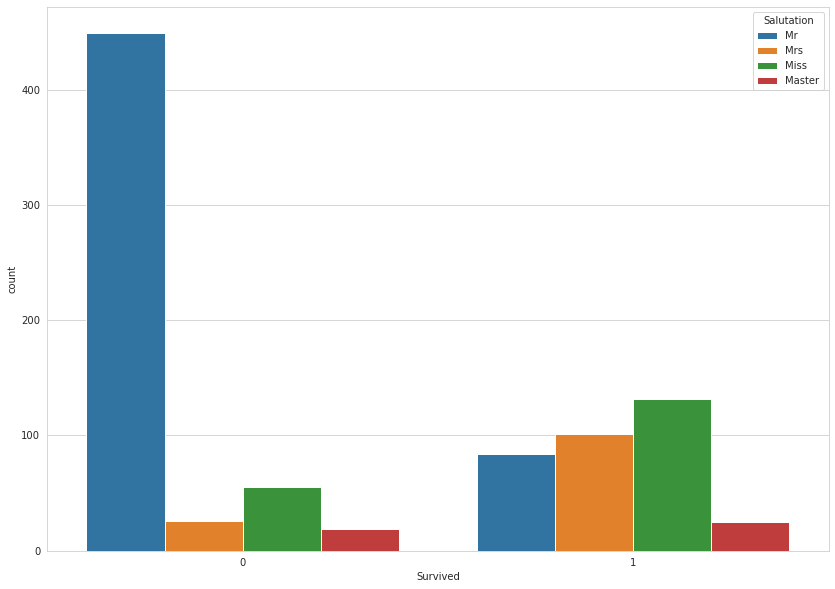

In [542]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Salutation', values = 'Sex' ,aggfunc ='count'))
plt.figure(figsize=(14,10))
sns.countplot(data=train, x='Survived', hue='Salutation')

**We can clearly see some patterns here e.g. more people with the 'Mrs' and 'Miss' prefixs survived, while more people with the prefix 'Mr' did not**

In [543]:
# We now drop the columns that we used 
train.drop('Name', axis=1, inplace=True)

### Cabin

In [544]:
# We miss 75% of 'Cabin' column data so we will drop it
train.drop('Cabin', axis=1, inplace=True)

### Fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64


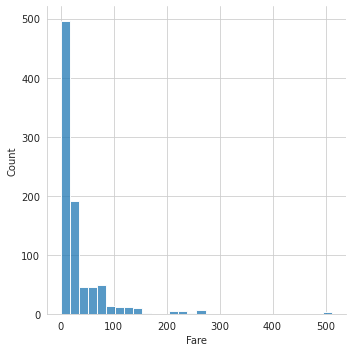

In [545]:
# lets check thow much people paid

print(train['Fare'].value_counts())
sns.displot(data=train, x='Fare', bins=30)

In [546]:
print(train.groupby(['Pclass','Embarked']).mean()['Fare'])

Pclass  Embarked
1st     C           104.150287
        Q            90.000000
        S            70.364862
2nd     C            25.358335
        Q            12.350000
        S            20.327439
3rd     C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64


**Clearly people at the first class paid on average higher Fare**

In [547]:
# lets categorize it the Fare in three groups (like the Classes) 
fare_groups = pd.qcut(train['Fare'], 4).value_counts()
fare_groups

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

In [548]:
train['Survived'].groupby(pd.qcut(train['Fare'], 4)).mean()

Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

**Clearly there is a correlation between Fare and Pclass. On average people that paid higher Fare and thus located at better Class had more chances to survive** 

In [549]:


def fare_group(fare):
    '''
    We decide to seperate the passengers into 4 Age Groups
    '''
    if fare <= 8.662:
        return 'cheap'
    elif fare <= 14.454:
        return 'normal'
    elif fare <= 31.0:
        return 'expensive'
    else:
        return 'very_expensive'

In [550]:
train['FareGroup'] = train['Fare'].apply(fare_group)
train.drop('Fare',axis = 1, inplace = True)

## Feature engineering

In [551]:
train.isnull().sum() # be sure that we do not miss values

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Embarked             0
AgeGroup             0
FamilySize           0
Ticket_first_char    0
Salutation           0
FareGroup            0
dtype: int64

In [552]:
# create dummy variables

pclass = pd.get_dummies(train['Pclass'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
salutation = pd.get_dummies(train['Salutation'],drop_first=True)
agegroup = pd.get_dummies(train['AgeGroup'],drop_first=True)
familySize = pd.get_dummies(train['FamilySize'],drop_first=True)
ticket_first_char=pd.get_dummies(train['Ticket_first_char'],drop_first=True)
fareGroup=pd.get_dummies(train['FareGroup'],drop_first=True)

In [553]:
train = pd.concat([train,pclass,sex,embark,salutation,agegroup,familySize,ticket_first_char,fareGroup], axis=1)

In [554]:
train.drop(['PassengerId','Pclass','Sex','Embarked','FamilySize','AgeGroup','Salutation','Ticket_first_char','FareGroup'],axis=1,inplace=True)
train.head()

,Survived,2nd,3rd,male,Q,S,Miss,Mr,Mrs,Adult,...,3,4,5,6,7,8,9,expensive,normal,very_expensive
0,0,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


## Train Test Split

In [555]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)


## Finding optimal parameters

In [556]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

In [557]:
log = LogisticRegression(max_iter = 10000)
rfc = RandomForestClassifier()
nb = GaussianNB()
sgd = SGDClassifier()

In [558]:
print(cross_val_score(log, X_train, y_train).mean())
print(cross_val_score(rfc, X_train, y_train).mean())
print(cross_val_score(nb, X_train, y_train).mean())
print(cross_val_score(sgd, X_train, y_train).mean())

0.8266967741935483
0.8026064516129032
0.5870064516129032
0.769058064516129


**The logisti regression model has the highest cross validation scoore with the Random Forest and Support Vector Machine following closely. This means that the Logistic Regression model predicts more efficiently out-of-sample data**

In [559]:
log.fit(X_train.values, y_train)
rfc.fit(X_train, y_train)
nb.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDClassifier()

In [560]:
predictions = log.predict(X_test.values)
predictions_2 = rfc.predict(X_test)
predictions_3 = nb.predict(X_test)
predictions_4 = sgd.predict(X_test)

# Evaluate my models

In [561]:
from sklearn.metrics import classification_report, accuracy_score

In [562]:
print(classification_report(y_test,predictions))
accuracy_score(predictions, y_test)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



0.8022388059701493

In [563]:
print(classification_report(y_test,predictions_2))
accuracy_score(predictions_2, y_test)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       154
           1       0.82      0.73      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



0.8171641791044776

In [564]:
print(classification_report(y_test,predictions_3))
accuracy_score(predictions_3, y_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       154
           1       0.75      0.75      0.75       114

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



0.7910447761194029

In [565]:
print(classification_report(y_test,predictions_4))
accuracy_score(predictions_4, y_test)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.80      0.70      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



0.7985074626865671

# Optimizing the best models

In [566]:
# GridSearch for the Logistic Regression model

param_grid = { 
    'C':  np.logspace(-3, 3, 50),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none','l1', 'l2','elasticnet']
}
CV_log = GridSearchCV(estimator=log, param_grid=param_grid, verbose=0)
CV_log.fit(X_train, y_train)
CV_log.best_params_
CV_log.best_estimator_

/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adam

LogisticRegression(C=1.5264179671752334, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [567]:
# GridSearch for the Random Forest Classifier model

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=0)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)

In [568]:
# GridSearch for the Naive Bayes Gaussian model

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

CV_nb = GridSearchCV(estimator=nb, param_grid=param_grid, verbose=0)
CV_nb.fit(X_train, y_train)
CV_nb.best_params_
CV_nb.best_estimator_

GaussianNB(var_smoothing=0.12328467394420659)

In [569]:
# GridSearch for the Support Vector Machine model

param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid, verbose=0)
CV_sgd.fit(X_train, y_train)
CV_sgd.best_params_
CV_sgd.best_estimator_

/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

SGDClassifier(alpha=0.001, penalty='l1')

In [570]:
predictions = CV_log.predict(X_test.values)
predictions_2 = CV_rfc.predict(X_test)
predictions_3 = CV_nb.predict(X_test)
predictions_4 = CV_sgd.predict(X_test)

/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Evalute my Model

In [571]:
print(classification_report(y_test,predictions))
accuracy_score(predictions, y_test)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       154
           1       0.81      0.70      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



0.8022388059701493

In [572]:
print(classification_report(y_test,predictions_2))
accuracy_score(predictions_2, y_test)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       154
           1       0.87      0.63      0.73       114

    accuracy                           0.80       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



0.8022388059701493

In [573]:
print(classification_report(y_test,predictions_3))
accuracy_score(predictions_3, y_test)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       154
           1       0.78      0.70      0.74       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



0.7873134328358209

In [574]:
print(classification_report(y_test,predictions_4))
accuracy_score(predictions_4, y_test)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.83      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



0.8134328358208955

**The models have an accuracy of around 80%, with the LR and SVM models slightly outperforming the other models. Even though these results are satisfying, it is undeniable that there is more room to discover new features and improve models, for example, the concept behind the `Ticket` may not be the best etc.**